In [1]:
# 한글 깨짐 해결방법 : 실행 후 Restart runtime 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (21.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 25.8 MB/s eta 0:00:00


In [ ]:
path = '/content/drive/MyDrive/학원/3차 프로젝트_5팀/[참고자료] 문장 유형 분류 AI 경진대회/open'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from konlpy.tag import Kkma
from konlpy.utils import pprint
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# Data Load

In [ ]:
df = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')

# Kiwi
https://bab2min.github.io/kiwipiepy/v0.8.0/kr/

< 문장 분리 >
https://bab2min.tistory.com/669

< 기본 사용법 및 워드클라우드 시각화 >
https://hleecaster.com/python-kiwi-text-analysis-1/

< 특징 >
- 멀티스레딩 지원
- 코퍼스로부터 미등록 단어 추출 가능
 - extract_word(reader, min_cnt=, max_word_len=, min_score=)
  - reader -> 호출 가능한(callable)객체여야 한다?
  - min_cnt -> 추출할 단어가 입력 텍스트 내에서 최소 몇 번 이상 등장할지
  - max_word_len -> 추출할 단어의 최대 길이
  - min_score -> 추출할 단어의 최소 점수
- 사용자 사전 추가 기능
 - add_user_word(word, tag="NNP", score=0)
 - 사용자 정의 사전은 UTF-8로 인코딩된 텍스트 파일이어야 한다.
  - 형식 -> 단어1 [탭문자] 품사태그 [탭문자] 단어점수
   - 단어점수는 생략시 0점이다.
- 형태소 분석
 - 점수제 방식으로 지원
  - 사용자 사전에서 단어별 태깅의 수를 크게주냐 적게주냐의 차이로 우선순위 선정 가능
- 문장 분리기능도 제공함.
 - 형태소 분석 결과 중 EF(종결어미) 및 SF(종결부호)의 등장 위치를 기반으로 후처리를 수행해 문장을 분리해준다.
 - from kiwipiepy import Kiwi
 - kiwi = Kiwi()
 - kiwi.split_into_sents("여러 문장으로 구성된 텍스트네 이걸 분리해줘")
 - [ output ]
 - '여러 문장으로 구성된 텍스트네'
 - '이걸 분리해줘'

# Kiwi 설치

In [ ]:
!pip install --upgrade pip
!pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.14.0-py3-none-any.whl size=30560039 sha256=2f605f7f4743505e858bfc8fb25318f90a926aab1b2c78702b705df100a4a977
  Stored in directory: /root/.cache/pip/wheels/51/c4/8a/496d744b1307d34d63960f7124851a3447db2f744cb7eb2aeb
Successfully built kiwipiepy-model


# 테스트

In [ ]:
# kiwipiepy 공개를 생성해 형태소 분석을 수행하는 간단한 예제 코드
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.prepare()
for result, score in kiwi.analyze("형태소 분석 결과입니다", top_n=5):
    print(score, result, sep='\t')

-29.27370262145996	[Token(form='형태소', tag='NNG', start=0, len=3), Token(form='분석', tag='NNG', start=4, len=2), Token(form='결과', tag='NNG', start=7, len=2), Token(form='이', tag='VCP', start=9, len=1), Token(form='ᆸ니다', tag='EF', start=9, len=3)]
-36.541473388671875	[Token(form='형태소', tag='NNG', start=0, len=3), Token(form='분석', tag='NNG', start=4, len=2), Token(form='결과', tag='NNG', start=7, len=2), Token(form='이', tag='VCP', start=9, len=1), Token(form='ᆸ니다', tag='EC', start=9, len=3)]
-50.577144622802734	[Token(form='형태소', tag='NNG', start=0, len=3), Token(form='분석', tag='NNG', start=4, len=2), Token(form='결과', tag='NNG', start=7, len=2), Token(form='입', tag='NNG', start=9, len=1), Token(form='니다', tag='EF', start=10, len=2)]
-50.773948669433594	[Token(form='형태소', tag='NNG', start=0, len=3), Token(form='분석', tag='NNG', start=4, len=2), Token(form='결과', tag='NNG', start=7, len=2), Token(form='입', tag='VV-R', start=9, len=1), Token(form='니다', tag='EF', start=10, len=2)]
-51.849662780761

In [ ]:
# tokenize를 사용해서 형태소 분석을 수행하면,
# 각 형태소가 token이라는 형식으로 담긴 list를 돌려준다.
kiwi.tokenize('테스트입니다.')

[Token(form='테스트', tag='NNG', start=0, len=3),
 Token(form='이', tag='VCP', start=3, len=1),
 Token(form='ᆸ니다', tag='EF', start=3, len=3),
 Token(form='.', tag='SF', start=6, len=1)]

In [ ]:
# token에서 형태소(form)와 tag(품사)를 분리해서 확인하기
result = kiwi.tokenize('테스트입니다.')
for token in result:
    print(f"{token.form}\t{token.tag}")

테스트	NNG
이	VCP
ᆸ니다	EF
.	SF


이러한 품사 태깅은 텍스트의 양과 질, 그리고 분석의 목표에 따라 

형태소 분리 결과 중 특정 품사만 선별적으로 활용하는게 더 효과적인 상황이 있기 때문에 

한국어 텍스트 분석에서는 반드시 필요하다.

# 시도

## 1-1. 주요어휘빈도.csv 생성
https://hleecaster.com/python-kiwi-text-analysis-1/

In [ ]:
# 형태소 분석 람다 함수를 활용해서 새로운 열에 형태소 분석 결과를 작성하기.
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.prepare()

morph_analysis = lambda x: kiwi.tokenize(x) if type(x) is str else None
df['형태소분석결과'] = df['문장'].apply(morph_analysis)

In [ ]:
# 형태소 분석 결과를 바탕으로 어휘 빈도 카운트
from collections import Counter


'''주요 품사, 용언 품사 정의'''
주요품사 = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'SL']
용언품사 = ['VV', 'VA']


'''Counter를 활용해 가장 많이 나온 n개의 품사 결과를 돌려주는 pos_count() 함수'''
def pos_count(df, col, output_filename, n=100):
    카운터 = Counter()
    
    for index, row in df.iterrows(): 
        if row[col]:
            필터링결과 = [(token.form, token.tag) for token in row[col] if token.tag in 주요품사]
            카운터.update(필터링결과)
            
    with open(output_filename, "w", encoding='utf-8-sig') as output_file:
        print("형태소,품사,개수", file=output_file)
        for (형태소, 품사), 개수 in 카운터.most_common(n):
            if 품사 in 용언품사:
                형태소 += "다"
            print(f"{형태소},{품사},{개수}", file=output_file)

- 파이썬의 collections.Counter()를 사용하면 쉽게 빈도를 카운트할 수 있다.
- 주요품사로 빈도를 카운트 할 품사들을 정의했다.
- 용언품사는 결과물에서 보기 좋도록 하기 위해 끝에다가 “다”를 붙여주기로 했다.
- df.iterrows()를 통해 모든 행을 반복하면서 수집 작업을 수행한다.
- 출력 결과는 csv 형식으로 저장한다. (인코딩은 윈도우 엑셀에서 오류 없이 열리도록 'utf-8-sig'로 지정했다.)

In [ ]:
## 저장
# pos_count(df, '형태소분석결과', './주요어휘빈도.csv')

## 1-2. 워드클라우드 시각화 -> 실패

< 한국어불용어(고빈도어) 출처 > https://bab2min.tistory.com/544

In [ ]:
file_path = '/content/drive/MyDrive/학원/3차 프로젝트_5팀/최지원/한국어불용어(고빈도어).txt'

with open(file_path) as f:
  lines = f.read().splitlines()

print(lines)

['이\tVCP\t0.018279601', '있\tVA\t0.011699048', '하\tVV\t0.009773658', '것\tNNB\t0.00973315', '들\tXSN\t0.00689824', '그\tMM\t0.005327252', '되\tVV\t0.00361335', '수\tNNB\t0.003473622', '이\tNP\t0.003361203', '보\tVX\t0.003310379', '않\tVX\t0.0029757', '없\tVA\t0.002920476', '나\tNP\t0.002690479', '사람\tNNG\t0.002073917', '주\tVV\t0.001884579', '아니\tVCN\t0.001870774', '등\tNNB\t0.001822074', '같\tVA\t0.001724522', '우리\tNP\t0.001714509', '때\tNNG\t0.001685684', '년\tNNB\t0.001647755', '가\tVV\t0.001618626', '한\tMM\t0.001584036', '지\tVX\t0.001537763', '대하\tVV\t0.00150378', '오\tVV\t0.001490884', '말\tNNG\t0.001321876', '일\tNNG\t0.001239799', '그렇\tVA\t0.001232062', '위하\tVV\t0.001170618', '때문\tNNB\t0.001146647', '그것\tNP\t0.001099161', '두\tVV\t0.001063053', '말하\tVV\t0.001030587', '알\tVV\t0.000995693', '그러나\tMAJ\t0.000978246', '받\tVV\t0.000924084', '못하\tVX\t0.000904665', '일\tNNB\t0.000880239', '그런\tMM\t0.000879481', '또\tMAG\t0.000870985', '문제\tNNG\t0.000823954', '더\tMAG\t0.000801652', '사회\tNNG\t0.000793459', '많\t

In [ ]:
import re

ind = []
for i in range(0, len(lines)):
    a = re.compile(r'[가-힣]+')
    ind.append(a.findall(lines[i]))
    
reviews = [item for sublist in ind for item in sublist]

In [ ]:
reviews

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '이',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

In [ ]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt


'''주요 품사, 용언 품사 정의'''
주요품사 = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'SL']
용언품사 = ['VV', 'VA']
stopwords = reviews


'''주요품사의 형태소만 리스트 형식으로 수집한다.'''
def read_documents(df, col):
    # 등장하는 형태소를 list 형식으로 수집
    문서 = []
    for index, row in df.iterrows(): 
        if row[col]:
            필터링결과 = [(token.form, token.tag) for token in row[col] if token.tag in 주요품사]
            필터링결과 = [form+"다" if tag in 용언품사 else form for form, tag in 필터링결과]
            문서.extend(필터링결과)
    return 문서


'''어휘 빈도를 계수하여 돌려준다.'''
def get_word_count(문서, log=False):
    어휘빈도 = Counter(문서)
    # 로그함수로 빈도 평탄화
    if log:
        어휘빈도_평탄화 = {word: int(math.log2(count)) for word, count in 어휘빈도.items()}
        return 어휘빈도_평탄화
    else:
        return 어휘빈도
    
    
'''워드 클라우드를 생성하여 돌려준다.'''
def build_cloud(어휘빈도):
    cloud_gen = WordCloud(
        width=800, height=480, 
        background_color="white", 
        colormap ="viridis", 
        font_path= "C:/Windows/Fonts/malgun.ttf", 
        max_words=50,
        collocations=True, 
        prefer_horizontal=1, 
        margin=30,
        relative_scaling='auto'
    )
    cloud = cloud_gen.generate_from_frequencies(어휘빈도)
    return cloud

'''워드 클라우드 이미지를 그려 파일로 저장한다.'''
def save_cloud(df, col, output_filename):
    문서 = read_documents(df, col)
    어휘빈도 = get_word_count(문서)
    for stopword in stopwords:
        어휘빈도.pop(stopword)
    cloud = build_cloud(어휘빈도)
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(output_filename, dpi=300)

- 주요 품사의 형태소만 수집한 리스트를 준비한다.
- 파이썬의 collections.Counter()를 사용하여, 리스트 내의 어휘 빈도를 카운트 한다.

  그리고 이 때 로그함수로 빈도를 평탄화 하는 옵션을 추가했다. (형태소의 빈도는 해당 형태소의 중요도 또는 영향력을 나타내는 지표라고 할 수 있는데, 단순한 빈도로만 워드클라우드를 그리면 특정 고빈도 형태소가 과대하게 나타나는 경우가 있기 때문에 로그 스케일링을 하기도 한다.)
- wordcloud.WordCloud()를 사용하여 워드 클라우드를 만든다. 이 때 이런저런 파라미터를 조정할 수 있다.

  이를 테면 max_words에서 최대 포함될 단어 수를 지정하거나, relative_scaling이라는 파라미터를 통해 (위에서 했던 로그 스케일링과 유사하게) 스케일링 할 수 있는 옵션 등이 있다.
- matplotlib을 통해 이미지 파일로 저장한다.
  이때 stopwords에 포함된 삭제할 단어들을 처리하게 해두었다. 사실 wordcloud.WordCloud()가 기본적으로 stopwords 옵션을 제공하긴 하지만 한국어는 지원하지 않는다. 그래서 그냥 직접 처리하는 방식으로.

In [ ]:
save_cloud(df, '형태소분석결과', './워드클라우드.png')

KeyError: ignored

## 2-1. 동시출현 단어 분석(어휘 공기 행렬 생성) -> 한글 깨짐

https://hleecaster.com/python-kiwi-text-analysis-2/

동시출현(Co-occurrence)이란 

한 문장, 문단 또는 텍스트 단위에서 같이 출현한 단어를 가리킨다.

언어학적 의미에서 의미적 근접성을 가리키며, 단어의 연결(collocation)을 찾는 데 활용된다.

이 개념에서 출발한 동시출현 네트워크(Co-occurrence networks)는 

특정 텍스트 단위에서 공동으로 출현한 단어의 집합적 상호 연결을 표현하는 방식이다.

나타나는 단어를 모두 표시한 뒤, 두 단어가 같은 문단에 들어가 있다면 둘 사이를 선으로 연결해 나가다 보면 단어의 네트워크를 만들 수 있게된다.

In [ ]:
# kiwi 형태소 분석 수행
# 위에서 한번 실행시켰다면 다시 실행시킬 필요X
from kiwipiepy import Kiwi
import pandas as pd

kiwi = Kiwi()
kiwi.prepare()

morph_analysis = lambda x: kiwi.tokenize(x) if type(x) is str else None
df['형태소분석결과'] = df['문장'].apply(morph_analysis)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


'''주요 품사, 용언 품사 정의'''
주요품사 = ["NNG", "NNP", "VV", "VA", "XR", "SL"]
용언품사 = ["VV", "VA" ]


'''형태소 분석 결과를 읽어서 원하는 형태소만 띄어쓰기한 결과를 수집한다.'''
def read_documents(df, col):
    문서리스트 = []
    for index, row in df.iterrows(): 
        if row[col]:
            필터링결과 = [(token.form, token.tag) for token in row[col] if token.tag in 주요품사]
            필터링결과 = [form+"다" if tag in 용언품사 else form for form, tag in 필터링결과]
        # 띄어쓰기 형식으로 수집
        문서 = " ".join(필터링결과)
        문서리스트.append(문서)
    return 문서리스트


'''문서 array로부터 문서-어휘 행렬을 생성한다.'''
def build_doc_term_mat(문서리스트):
    vectorizer = CountVectorizer(tokenizer=str.split, binary=True, max_features=50)
    문서어휘행렬 = vectorizer.fit_transform(문서리스트)
    어휘리스트 = vectorizer.get_feature_names()
    # 어휘 리스트 함께 돌려준다.
    return 문서어휘행렬, 어휘리스트


'''문서-어휘 행렬의 축을 바꾼 후 원래 행렬에 곱해서 어휘 공기 행렬을 생성한다.'''
def build_word_cooc_mat(문서어휘행렬):
    어휘공기행렬 = 문서어휘행렬.T * 문서어휘행렬
    # 행렬의 대각선 값을 0으로
    어휘공기행렬.setdiag(0)
    return 어휘공기행렬.toarray()

- sklearn 의 CountVectorizer 를 활용한다.
- 용언품사는 읽기 편하도록 형태소 뒤에 “-다”를 붙여줬다.
- 문서-어휘 행렬을 생성할 때 포함할 어휘 최대 개수는 50으로 설정했다. 이때 어휘리스트는 별도로 저장해두어야 한다. 나중에 어휘공기행렬을 작성할 때 필요하기 때문에.

In [ ]:
문서리스트 = read_documents(df, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

'''데이터프레임 변환 후 csv 저장'''
# df_어휘공기행렬 = pd.DataFrame(어휘공기행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘공기행렬.to_csv("./어휘공기행렬.csv", encoding="utf-8-sig", mode='w')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'데이터프레임 변환 후 csv 저장'

## 2-2. 동시출현 단어 네트워크 시각화
각 문서의 길이가 짧고, 문서 수가 충분히 많을 경우에는 

이렇게 때 동시출현 빈도(어휘 공기 행렬)를 직접 사용해서 네트워크를 그려줄 수 있지만, 

만약 문서의 길이가 길다면 차라리 어휘 간의 유사도를 계산해서 이를 시각화 하는 게 낫다.


In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from itertools import combinations
from operator import itemgetter
import matplotlib.pyplot as plt
import networkx as nx


'''어휘 공기 행렬을 어휘 유사도 행렬로 변환한다.'''
def get_word_sim_mat(어휘공기행렬):
    어휘유사도행렬 = pdist(어휘공기행렬, metric='correlation')
    어휘유사도행렬 = squareform(어휘유사도행렬)
    return 어휘유사도행렬


'''어휘 유사도 행렬(또는 어휘 공기 행렬)을 정렬하여 리스트로 돌려준다.'''
def get_sorted_word_sims(어휘유사도행렬, 어휘리스트):
    sims = []
    for i, j in combinations(range(len(어휘리스트)), 2):
        if 어휘유사도행렬[i, j] == 0:
            continue
        sims.append((어휘리스트[i], 어휘리스트[j], 어휘유사도행렬[i, j]))
    행렬리스트변환 = sorted(sims, key=itemgetter(2), reverse=True)
    return 행렬리스트변환


'''네트워크를 생성하여 돌려준다.'''
def build_word_sim_network(행렬리스트변환, minimum_span=False):
    G = nx.Graph()
    NUM_MAX_WORDS = 30
    for word1, word2, sim in 행렬리스트변환[:NUM_MAX_WORDS]:
        G.add_edge(word1, word2, weight=sim)
    # 최소 신장 트리
    if minimum_span:
        return nx.minimum_spanning_tree(G)
    else:
        return G
    

'''네트워크를 시각화하여 저장한다.'''
def draw_network(G, output_filename):

    # edge 굵기 설정
    weights = nx.get_edge_attributes(G,'weight').values()
    width = [weight / max(weights) for weight in weights]

    nx.draw_networkx(G,
        node_size=[val*100 for (node, val) in G.degree()],
        # pos=nx.spring_layout(G),
        pos=nx.kamada_kawai_layout(G),
        # node_size=500,
        node_color="lightblue",
        font_color="black", 
        font_family="NanumBarunGothic",
        with_labels=True,
        font_size=7,
        width=width*2)
    plt.axis("off")
    plt.savefig(output_filename, dpi=300)

- 어휘 공기 행렬을 바탕으로 유사도를 구할 때는 scipy.spatial.distance 의 pdist를 사용한다. metric으로는 ‘correlation’, ‘cosine’, ‘euclidean’ 등을 사용할 수 있다. (scipy 공식문서를 참고하자.)
- get_sorted_word_sims() 함수는 행렬의 값들을 정렬하여 리스트 형식으로 변환하는 건데, 여기서 첫 번째 인자로 어휘 유사도 행렬이 아니라 어휘 공기 행렬을 직접 사용할 수도 있다. 각 문서의 길이가 짧을 경우에는 이 방법이 더 나은 결과를 보여주기도 한다.
- 파이썬 네트워크 시각화는 보통 networkx 라는 라이브러리를 사용한다. NUM_MAX_WORDS로 표현 개수를 설정했다.
- node(어휘) 간 edge(동시출현빈도)가 너무 많아서 네트워크가 복잡해질 때는 edge 수를 적절히 생략해야 하는데, 이 때 사용할 수 있는 방법 중 하나가 최소 신장 트리(Minimum Spanning Tree)다. 모든 노드를 최소의 비용으로 연결 가능하도록 링크를 최소화하여 트리를 구성한다. 필요에 따라 사용하자.
- 네트워크를 그릴 때 edge의 굵기를 0~1 사이로 설정할 수 있다.

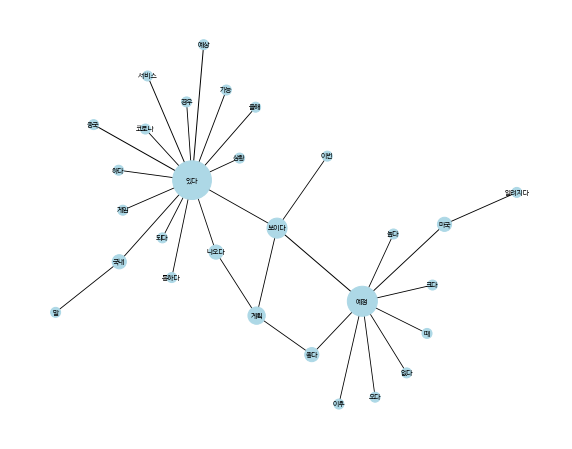

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, './네트워크.png')

In [ ]:
df.head(2)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[(0.75, SN, 0, 4), (%포인트, NNG, 4, 4), (금리, NNG..."
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[(이어, MAG, 0, 2), (＂, SW, 3, 1), (앞, NNG, 4, 1..."


### 문장의 유형 - 사실형

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('유형').get_group('사실형')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[(0.75, SN, 0, 4), (%포인트, NNG, 4, 4), (금리, NNG..."
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[(이어, MAG, 0, 2), (＂, SW, 3, 1), (앞, NNG, 4, 1..."
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실,"[(정부, NNG, 0, 2), (가, JKS, 2, 1), (고, XPN, 4, ..."


In [ ]:
문서리스트 = read_documents(data1, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


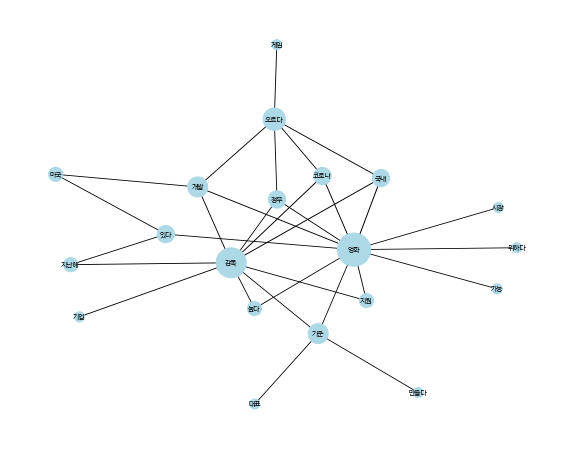

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/사실형.png')

### 문장의 유형 - 추론형

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data2 = data.groupby('유형').get_group('추론형')
data2.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
11,TRAIN_00011,취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.,추론형,부정,현재,확실,추론형-부정-현재-확실,"[(취약, NNG, 0, 2), (점, NNG, 2, 1), (을, JKO, 3, ..."
17,TRAIN_00017,서울 아파트 매매가격이 여전히 상승세를 이어가고 있기 때문이다.,추론형,긍정,현재,확실,추론형-긍정-현재-확실,"[(서울, NNP, 0, 2), (아파트, NNG, 3, 3), (매매, NNG, ..."
21,TRAIN_00021,1점 차로 초박빙 승부를 펼친 소리꾼 전영랑과 트로트 요정 강유진은 민요와 트로트의...,추론형,긍정,과거,확실,추론형-긍정-과거-확실,"[(1, SN, 0, 1), (점, NNB, 1, 1), (차, NNG, 3, 1)..."


In [ ]:
문서리스트 = read_documents(data2, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


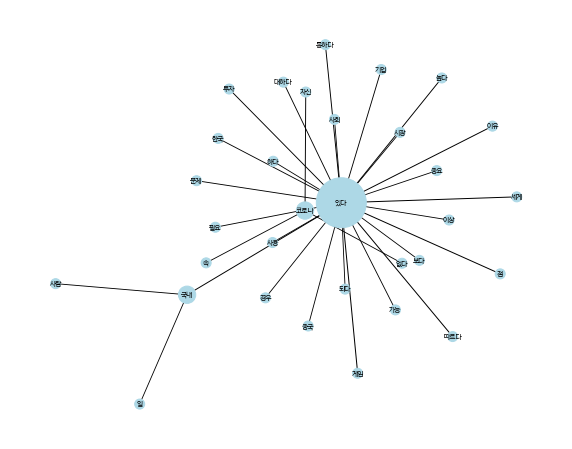

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/추론형.png')

### 문장의 유형 - 대화형

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data3 = data.groupby('유형').get_group('대화형')
data3.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
39,TRAIN_00039,사람 친구는 어느 한쪽에 애인이 생기면 끊어주는 게 쌈빡한 예의 아닐까.,대화형,긍정,미래,확실,대화형-긍정-미래-확실,"[(사람, NNG, 0, 2), (친구, NNG, 3, 2), (는, JX, 5, ..."
63,TRAIN_00063,＂산소통도 셰르파도 포기한 채 나만의 힘으로 오른다는 뜻입니다.＂,대화형,긍정,현재,확실,대화형-긍정-현재-확실,"[(＂, SW, 0, 1), (산, NNG, 1, 1), (소통, NNG, 2, 2..."
72,TRAIN_00072,＂최민철 배우의 A형 독감 확진 판정으로 뮤지컬 레베카 1월 4일 잭 파벨 역 캐스...,대화형,긍정,과거,확실,대화형-긍정-과거-확실,"[(＂, SW, 0, 1), (최민철, NNP, 1, 3), (배우, NNG, 5,..."


In [ ]:
문서리스트 = read_documents(data3, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


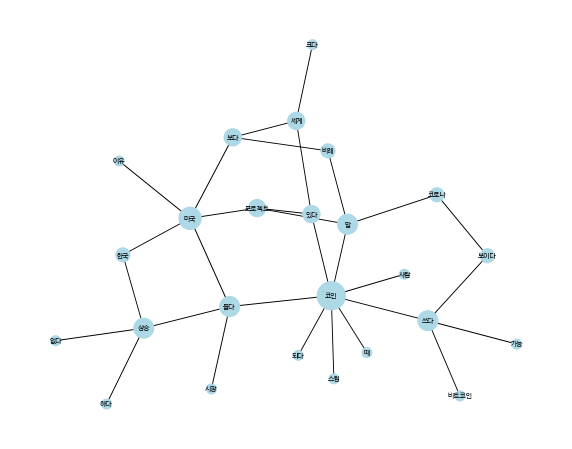

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/대화형.png')

### 문장의 유형 - 예측형

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data4 = data.groupby('유형').get_group('예측형')
data4.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
12,TRAIN_00012,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,예측형,긍정,미래,불확실,예측형-긍정-미래-불확실,"[(비, NNG, 0, 1), (가, JKS, 1, 1), (내리, VV, 3, 2..."
47,TRAIN_00047,＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...,예측형,부정,과거,확실,예측형-부정-과거-확실,"[(＂, SW, 0, 1), (OTT, SL, 1, 3), (사업, NNG, 5, ..."
147,TRAIN_00147,해상에서는 서해상을 중심으로 돌풍과 함께 천둥·번개가 치는 곳이 있겠다.,예측형,미정,미래,불확실,예측형-미정-미래-불확실,"[(해상, NNG, 0, 2), (에서, JKB, 2, 2), (는, JX, 4, ..."


In [ ]:
문서리스트 = read_documents(data4, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


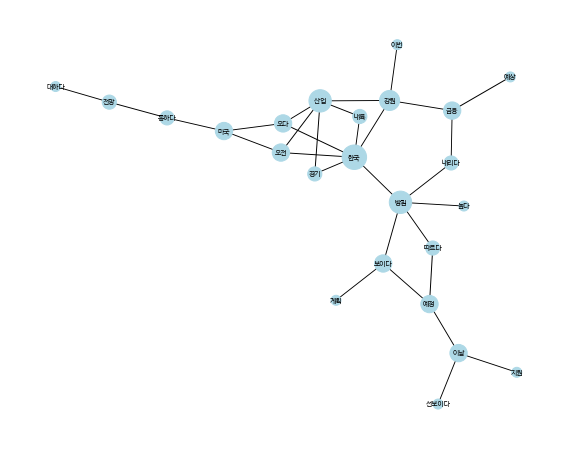

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/예측형.png')

### 문장의 극성 - 긍정

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data5 = data.groupby('극성').get_group('긍정')
data5.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[(0.75, SN, 0, 4), (%포인트, NNG, 4, 4), (금리, NNG..."
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[(이어, MAG, 0, 2), (＂, SW, 3, 1), (앞, NNG, 4, 1..."
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실,"[(정부, NNG, 0, 2), (가, JKS, 2, 1), (고, XPN, 4, ..."


In [ ]:
문서리스트 = read_documents(data5, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


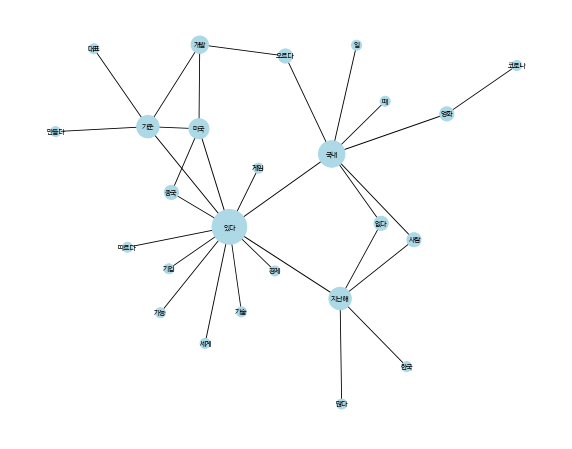

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/긍정.png')

### 문장의 극성 - 부정

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data6 = data.groupby('극성').get_group('부정')
data6.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
11,TRAIN_00011,취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.,추론형,부정,현재,확실,추론형-부정-현재-확실,"[(취약, NNG, 0, 2), (점, NNG, 2, 1), (을, JKO, 3, ..."
46,TRAIN_00046,1일 시장조사 업체인 D램익스체인지에 따르면 지난해 12월 D램(DDR4 8Gb) ...,사실형,부정,과거,확실,사실형-부정-과거-확실,"[(1, SN, 0, 1), (일, NNB, 1, 1), (시장, NNG, 3, 2..."
47,TRAIN_00047,＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...,예측형,부정,과거,확실,예측형-부정-과거-확실,"[(＂, SW, 0, 1), (OTT, SL, 1, 3), (사업, NNG, 5, ..."


In [ ]:
문서리스트 = read_documents(data6, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


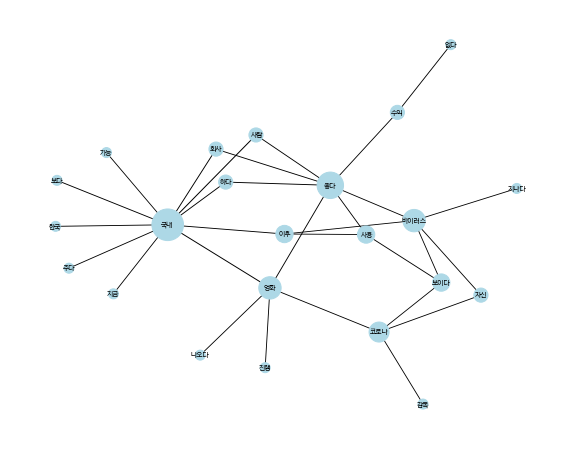

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/부정.png')

### 문장의 극성 - 미정

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data7 = data.groupby('극성').get_group('미정')
data7.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
45,TRAIN_00045,"＇월드 오브 드래곤네스트＇는 오는 8일 말레이시아, 싱가포르, 인도네시아, 필리핀,...",사실형,미정,현재,확실,사실형-미정-현재-확실,"[(＇, SW, 0, 1), (월드, NNG, 1, 2), (오브, NNG, 4, ..."
147,TRAIN_00147,해상에서는 서해상을 중심으로 돌풍과 함께 천둥·번개가 치는 곳이 있겠다.,예측형,미정,미래,불확실,예측형-미정-미래-불확실,"[(해상, NNG, 0, 2), (에서, JKB, 2, 2), (는, JX, 4, ..."
244,TRAIN_00244,LAH는 에어버스헬리콥터의 H155B1 플랫폼을 기반으로 최신 항전장비와 무장사격통...,사실형,미정,미래,확실,사실형-미정-미래-확실,"[(LAH, SL, 0, 3), (는, JX, 3, 1), (에어버스, NNP, 5..."


In [ ]:
문서리스트 = read_documents(data7, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


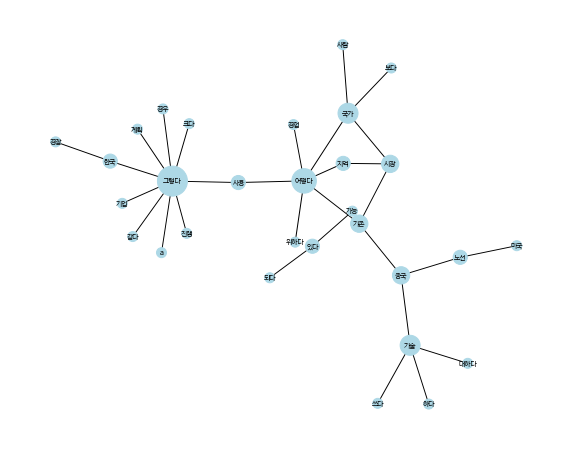

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/미정.png')

### 문장의 시제 - 과거

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data8 = data.groupby('시제').get_group('과거')
data8.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[(이어, MAG, 0, 2), (＂, SW, 3, 1), (앞, NNG, 4, 1..."
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[(서울시, NNP, 0, 3), (는, JX, 3, 1), (올해, NNG, 5,..."
8,TRAIN_00008,이번 서비스에는 네이버가 자체 개발한 초대규모 AI 하이퍼클로바 기술이 적용됐다.,사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[(이번, NNG, 0, 2), (서비스, NNG, 3, 3), (에, JKB, 6..."


In [ ]:
문서리스트 = read_documents(data8, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


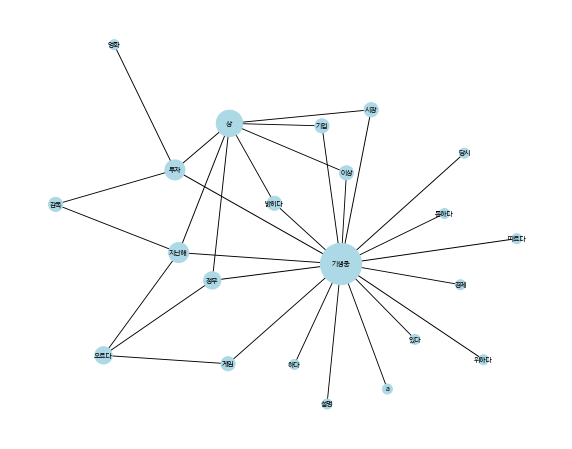

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/과거.png')

### 문장의 시제 - 현재

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data9 = data.groupby('시제').get_group('현재')
data9.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[(0.75, SN, 0, 4), (%포인트, NNG, 4, 4), (금리, NNG..."
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[(익사, NNG, 0, 2), (하, XSV, 2, 1), (ᆫ, ETM, 2, ..."
5,TRAIN_00005,이같은 변화를 포함해 올해 종부세 과세 대상은 당초 21만4000명에서 12만100...,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[(이, NP, 0, 1), (같, VA, 1, 1), (은, ETM, 2, 1),..."


In [ ]:
문서리스트 = read_documents(data9, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


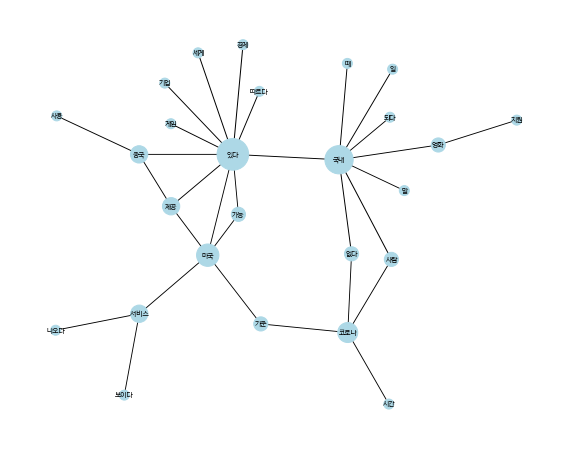

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/현재.png')

### 문장의 시제 - 미래

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data10 = data.groupby('시제').get_group('미래')
data10.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실,"[(정부, NNG, 0, 2), (가, JKS, 2, 1), (고, XPN, 4, ..."
12,TRAIN_00012,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,예측형,긍정,미래,불확실,예측형-긍정-미래-불확실,"[(비, NNG, 0, 1), (가, JKS, 1, 1), (내리, VV, 3, 2..."
39,TRAIN_00039,사람 친구는 어느 한쪽에 애인이 생기면 끊어주는 게 쌈빡한 예의 아닐까.,대화형,긍정,미래,확실,대화형-긍정-미래-확실,"[(사람, NNG, 0, 2), (친구, NNG, 3, 2), (는, JX, 5, ..."


In [ ]:
문서리스트 = read_documents(data10, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


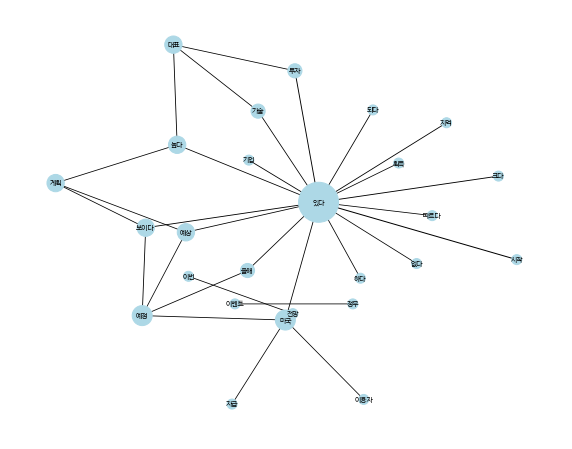

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/미래.png')

### 문장의 확실성 - 확실

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data11 = data.groupby('확실성').get_group('확실')
data11.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[(0.75, SN, 0, 4), (%포인트, NNG, 4, 4), (금리, NNG..."
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[(이어, MAG, 0, 2), (＂, SW, 3, 1), (앞, NNG, 4, 1..."
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실,"[(정부, NNG, 0, 2), (가, JKS, 2, 1), (고, XPN, 4, ..."


In [ ]:
문서리스트 = read_documents(data11, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


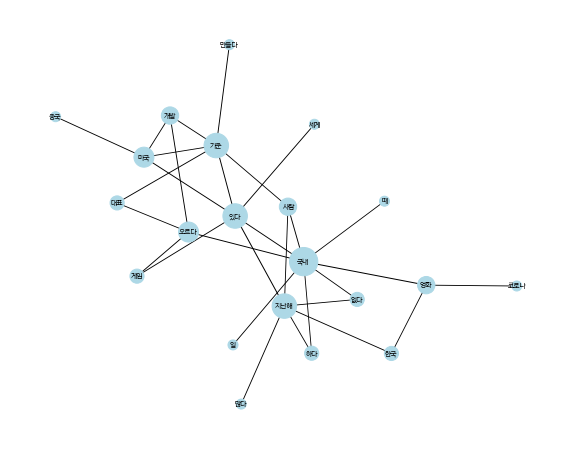

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/확실.png')

### 문장의 확실성 - 불확실

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data12 = data.groupby('확실성').get_group('불확실')
data12.head(3)

,ID,문장,유형,극성,시제,확실성,label,형태소분석결과
12,TRAIN_00012,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,예측형,긍정,미래,불확실,예측형-긍정-미래-불확실,"[(비, NNG, 0, 1), (가, JKS, 1, 1), (내리, VV, 3, 2..."
32,TRAIN_00032,팔각정은 관광도로로 유명한 ＇북악 스카이웨이＇로 인근에 있어 이륜차 운전자들이 즐겨...,추론형,긍정,현재,불확실,추론형-긍정-현재-불확실,"[(팔각정, NNG, 0, 3), (은, JX, 3, 1), (관광도로, NNP, ..."
52,TRAIN_00052,한빛소프트는 올해도 리폼 이벤트를 계속 진행할 계획이다.,사실형,긍정,미래,불확실,사실형-긍정-미래-불확실,"[(한빛소프트, NNP, 0, 5), (는, JX, 5, 1), (올해, NNG, ..."


In [ ]:
문서리스트 = read_documents(data12, '형태소분석결과')
문서어휘행렬, 어휘리스트 = build_doc_term_mat(문서리스트)
어휘공기행렬 = build_word_cooc_mat(문서어휘행렬)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


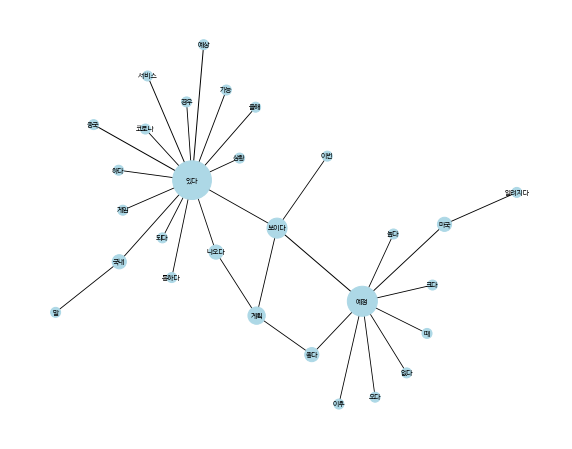

In [ ]:
어휘유사도행렬 = get_word_sim_mat(어휘공기행렬)
'''데이터프레임 변환 후 csv 저장'''
# df_어휘유사도행렬 = pd.DataFrame(어휘유사도행렬, columns=어휘리스트, index=어휘리스트)
# df_어휘유사도행렬.to_csv("./어휘유사도행렬.csv", encoding="utf-8-sig", mode='w')

# 어휘유사도행렬 대신 어휘공기행렬을 직접 사용해도 된다.

행렬리스트변환 = get_sorted_word_sims(어휘유사도행렬, 어휘리스트)
G = build_word_sim_network(행렬리스트변환)
plt.figure(figsize=(10, 8))
draw_network(G, '/content/drive/MyDrive/학원/3차 프로젝트_5팀/공유 작업물/네트워크/불확실.png')

## 토픽 모델링 (하나 건졌다!!)

## 3-1. 토픽 모델링 소개
https://hleecaster.com/python-kiwi-text-analysis-3/

토픽 모델링이란?

텍스트 코퍼스에서 토픽을 식별하는데 사용하는 자연어 처리 기술이다.

알고리즘을 사용하여 문서 모음에서 숨겨진 구조를 발견하고 이러한 주제를 일련의 키워드 또는 용어로 나타낸다.

목표는 단순한 단어 빈도 패턴이 아니라 문서 모음에서 발생하는 추상적인 '주제'를 식별하는 것이다.

이는 문서 분류, 정보 검색 및 콘텐츠 추천과 같은 작업에 도움이 될 수 있다.

그래서 토픽 모델링을 통해 우리는 문서 집합 내에 포함된 주요 주제, 혹은 정리된 개념들을 추출할 수 있다.

각 문서의 특성에 따라 각 토픽과의 연계 정도, 혹은 중요도가 다르게 매겨진다.

토픽 모델링에서는 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA) 이라는 확률 모형을 많이 사용하는데, 더 공부해야한다.

In [ ]:
# kiwi 형태소 분석 수행
from kiwipiepy import Kiwi
import pandas as pd

kiwi = Kiwi()
kiwi.prepare()

morph_analysis = lambda x: kiwi.tokenize(x) if type(x) is str else None
df['형태소분석결과'] = df['문장'].apply(morph_analysis)

토픽 모델링은 TF-IDF를 

<code>from sklearn.decomposition import LatentDirichletAllocation</code>을 사용해서 
수행함.

https://wikidocs.net/40710

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

print('뉴스 개수 :',len(df))

뉴스 개수 : 16541


In [ ]:
# df에서 필요한 부분은 '문장'부분이므로 이 부분만 별도로 저장하기.
text = df[['문장']]
text.head(3)

,문장
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...


## 3-2. 텍스트 전처리
사용한 전처리 기법 : 불용어 제거, 표제어 추출, 길이가 짧은 단어 제거

### NLTK의 word_tokenize를 통해 단어 토큰화 수행

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)
text.head(5)

,문장
0,"[0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음..."
1,"[이어, ＂앞으로, 전문가들과, 함께, 4주, 단위로, 상황을, 재평가할, 예정＂이..."
2,"[정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3..."
3,"[서울시는, 올해, 3월, 즉시, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지..."
4,"[익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,..."


### 불용어 제거

In [ ]:
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
text.head(5)

,문장
0,"[0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음..."
1,"[이어, ＂앞으로, 전문가들과, 함께, 4주, 단위로, 상황을, 재평가할, 예정＂이..."
2,"[정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3..."
3,"[서울시는, 올해, 3월, 즉시, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지..."
4,"[익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,..."


### 표제어 추출
표제어 추출로 3인칭 단수 표현을 1인칭으로 바꾸고, 과거 현재형 동사를 현재형으로 바꾼다.

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
text.head(5)

,문장
0,"[0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음..."
1,"[이어, ＂앞으로, 전문가들과, 함께, 4주, 단위로, 상황을, 재평가할, 예정＂이..."
2,"[정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3..."
3,"[서울시는, 올해, 3월, 즉시, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지..."
4,"[익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,..."


In [ ]:
# 길이가 3 이하인 단어 제거하기
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])
tokenized_doc[:5]

0                                  [0.75, 1994년, 처음이다]
1    [＂앞으로, 전문가들과, 재평가할, 예정＂이라며, 이전이라도, 충족하면, 격리의무,...
2                                   [7월부터, 연말까지, 확대한다]
3    [서울시는, 유예시간, 60분을, 제공하겠다고, 밝혔지만, 자전거도로는, 하겠다고,...
4                                         [사다리에, 소금으로]
Name: 문장, dtype: object

## 3-3. TF-IDF 행렬 만들기

TF-IDF(Term Frequency - Inverse Document Frequency)는 문서 또는 문서 모음(말뭉치)에서 단어의 중요성을 평가하는 데 사용되는 통계적 척도이다.

TF는 문서에서 단어의 빈도를 나타내고 IDF는 말뭉치에서 단어의 중요성, 즉 모든 문서에서 단어의 빈도를 나타냅니다. 

이 두 값의 곱이 TF-IDF 점수이며, 이는 말뭉치의 나머지 부분과 비교하여 문서에서 단어의 중요성 순위를 매기는 데 사용된다.

TF-IDF 점수가 높을수록 단어가 더 중요하고 문서와 관련이 있으며 텍스트 분류 또는 정보 검색에 좋은 기능임을 나타냅니다.

TfidfVectorizer는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용한다.

이를 사용하기 위해 다시 토큰화 작업을 역으로 되돌리는 역토큰화(Detokenization) 작업을 수행해야한다.

### 역토큰화

In [ ]:
detokenized_doc = []

for i in range(len(text)):
  t = ' '.join(tokenized_doc[i])
  detokenized_doc.append(t)

# 다시 text['문장']에 재저장
text['문장'] = detokenized_doc
text['문장'][:5]

0                                 0.75 1994년 처음이다
1    ＂앞으로 전문가들과 재평가할 예정＂이라며 이전이라도 충족하면 격리의무 것＂이라고
2                                  7월부터 연말까지 확대한다
3     서울시는 유예시간 60분을 제공하겠다고 밝혔지만 자전거도로는 하겠다고 바꾸기도
4                                       사다리에 소금으로
Name: 문장, dtype: object

### TF-IDF 행렬 만들기

In [ ]:
from numpy.lib.function_base import vectorize
# 텍스트 데이터에 있는 모든 단어를 가지고 행렬 만들기
vectorizer = TfidfVectorizer(stop_words=reviews)
X = vectorizer.fit_transform(text['문장'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :', X.shape)

TF-IDF 행렬의 크기 : (16541, 51035)


### 토픽 모델링 - LDA(Latent Dirichlet Allocation)
- LDA 기법은 단순히 주제만 분류해주는 것이 아니라 주제에 포함되는 키워드들을 보여주기 때문에 그 키워드들로 해당 주제를 해석하고 정의할 수 있다.

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_top = lda_model.fit_transform(X)

print(lda_model.components_)
print()
print(lda_model.components_.shape)

[[0.10021899 0.10020817 0.10025807 ... 0.9913775  0.10022624 0.10026013]
 [0.6557281  0.10024292 0.10022195 ... 0.10024568 0.10022222 0.10023115]
 [0.10027663 0.1002331  0.10022016 ... 0.10028834 0.10026929 0.10032427]
 ...
 [0.10028024 0.1002898  0.10026432 ... 0.10027894 0.10023656 0.9729996 ]
 [0.10026179 0.10025358 0.10021081 ... 0.10024537 0.10020195 0.10024884]
 [0.10021397 0.1002422  0.10027083 ... 0.10023079 0.50493947 0.10022736]]

(10, 51035)


In [ ]:
# 단어 집합
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
  for idx, topic in enumerate(components):
    print('Topic %d:' % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('기록했다', 19.29), ('상황이다', 15.18), ('재판부는', 14.65), ('디아블로', 13.96), ('상승세를', 11.66)]
Topic 2: [('예정이다', 40.09), ('가능하다', 30.57), ('으로', 23.23), ('2019년', 17.33), ('메타버스', 15.66)]
Topic 3: [('위해서는', 27.83), ('에서', 21.83), ('선보였다', 18.6), ('없다', 15.26), ('관리처분계획인가를', 14.8)]
Topic 4: [('있다', 30.2), ('2018년', 27.13), ('설명했다', 25.65), ('나타났다', 19.62), ('중심으로', 17.17)]
Topic 5: [('기생충', 61.71), ('아카데미', 34.53), ('전망이다', 32.66), ('2020년', 24.09), ('필요하다', 18.28)]
Topic 6: [('라는', 22.58), ('있습니다', 18.4), ('가능성도', 15.64), ('위변조로', 14.41), ('방침이다', 14.01)]
Topic 7: [('코로나19', 54.1), ('가능성이', 27.67), ('알려졌다', 24.14), ('서비스를', 23.44), ('이라는', 22.0)]
Topic 8: [('때문이다', 47.48), ('것이라는', 27.88), ('상대적으로', 12.03), ('대통령이', 11.7), ('이라고', 11.49)]
Topic 9: [('계획이다', 30.91), ('블록체인', 29.81), ('과정에서', 23.34), ('이다', 21.78), ('이야기를', 17.75)]
Topic 10: [('이라고', 22.5), ('강조했다', 22.02), ('한다', 20.7), ('라고', 17.88), ('가능성을', 14.99)]


만약 레이블 별로 다 쪼개서 토픽 모델링을 돌리고

그 결과로 나온 단어 집합을 이용하여 전처리를 한다면?

## 토픽 시각화

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


TypeError: ignored

#### 문서 별 토픽 분포 보기

# '부정'레이블 토픽 모델링

In [ ]:
data = df.copy()

# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data = data.groupby('극성').get_group('부정')
data.head(3)

,ID,문장,유형,극성,시제,확실성,label
11,TRAIN_00011,취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.,추론형,부정,현재,확실,추론형-부정-현재-확실
46,TRAIN_00046,1일 시장조사 업체인 D램익스체인지에 따르면 지난해 12월 D램(DDR4 8Gb) ...,사실형,부정,과거,확실,사실형-부정-과거-확실
47,TRAIN_00047,＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...,예측형,부정,과거,확실,예측형-부정-과거-확실


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

print('문장 개수 :',len(data))

문장 개수 : 565


In [ ]:
text = data[['문장']]
text.head(5)

,문장
11,취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.
46,1일 시장조사 업체인 D램익스체인지에 따르면 지난해 12월 D램(DDR4 8Gb) ...
47,＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...
65,"회사가 임금 인상률이나 퇴직률, 운용 수익률 등 연금액 산정의 기초가 되는 모든 사..."
121,위성정당은 중도층 흡수를 위해 만든 것이 아니다.


In [ ]:
# 텍스트 전처리
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)
print(text.head(5))

                                                    문장
11   [취약점을, 보완하기, 위해, 무작정, 강력한, 보안장치를, 도입할, 수도, 없다, .]
46   [1일, 시장조사, 업체인, D램익스체인지에, 따르면, 지난해, 12월, D램, (...
47   [＂OTT, 사업을, 처음부터, 직접, 키우려, 했다면, 쿠팡플레이의, ＇타임, 투...
65   [회사가, 임금, 인상률이나, 퇴직률, ,, 운용, 수익률, 등, 연금액, 산정의,...
121              [위성정당은, 중도층, 흡수를, 위해, 만든, 것이, 아니다, .]


<ipython-input-89-c26f959d0e42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)


In [ ]:
# 한국 불용어 정의
file_path = '/content/drive/MyDrive/3차 프로젝트_5팀/최지원/한국어불용어(고빈도어).txt'

with open(file_path) as f:
  lines = f.read().splitlines()
  
print(lines)

['이\tVCP\t0.018279601', '있\tVA\t0.011699048', '하\tVV\t0.009773658', '것\tNNB\t0.00973315', '들\tXSN\t0.00689824', '그\tMM\t0.005327252', '되\tVV\t0.00361335', '수\tNNB\t0.003473622', '이\tNP\t0.003361203', '보\tVX\t0.003310379', '않\tVX\t0.0029757', '없\tVA\t0.002920476', '나\tNP\t0.002690479', '사람\tNNG\t0.002073917', '주\tVV\t0.001884579', '아니\tVCN\t0.001870774', '등\tNNB\t0.001822074', '같\tVA\t0.001724522', '우리\tNP\t0.001714509', '때\tNNG\t0.001685684', '년\tNNB\t0.001647755', '가\tVV\t0.001618626', '한\tMM\t0.001584036', '지\tVX\t0.001537763', '대하\tVV\t0.00150378', '오\tVV\t0.001490884', '말\tNNG\t0.001321876', '일\tNNG\t0.001239799', '그렇\tVA\t0.001232062', '위하\tVV\t0.001170618', '때문\tNNB\t0.001146647', '그것\tNP\t0.001099161', '두\tVV\t0.001063053', '말하\tVV\t0.001030587', '알\tVV\t0.000995693', '그러나\tMAJ\t0.000978246', '받\tVV\t0.000924084', '못하\tVX\t0.000904665', '일\tNNB\t0.000880239', '그런\tMM\t0.000879481', '또\tMAG\t0.000870985', '문제\tNNG\t0.000823954', '더\tMAG\t0.000801652', '사회\tNNG\t0.000793459', '많\t

In [ ]:
import re

ind = []
for i in range(0, len(lines)):
    a = re.compile(r'[가-힣]+')
    ind.append(a.findall(lines[i]))
    
reviews = [item for sublist in ind for item in sublist]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                    문장
11   [취약점을, 보완하기, 위해, 무작정, 강력한, 보안장치를, 도입할, 수도, 없다, .]
46   [1일, 시장조사, 업체인, D램익스체인지에, 따르면, 지난해, 12월, D램, (...
47   [＂OTT, 사업을, 처음부터, 직접, 키우려, 했다면, 쿠팡플레이의, ＇타임, 투...
65   [회사가, 임금, 인상률이나, 퇴직률, ,, 운용, 수익률, 연금액, 산정의, 기초...
121              [위성정당은, 중도층, 흡수를, 위해, 만든, 것이, 아니다, .]


<ipython-input-93-8308aac4e744>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])


In [ ]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                                    문장
11   [취약점을, 보완하기, 위해, 무작정, 강력한, 보안장치를, 도입할, 수도, 없다, .]
46   [1일, 시장조사, 업체인, D램익스체인지에, 따르면, 지난해, 12월, D램, (...
47   [＂OTT, 사업을, 처음부터, 직접, 키우려, 했다면, 쿠팡플레이의, ＇타임, 투...
65   [회사가, 임금, 인상률이나, 퇴직률, ,, 운용, 수익률, 연금액, 산정의, 기초...
121              [위성정당은, 중도층, 흡수를, 위해, 만든, 것이, 아니다, .]


<ipython-input-94-31c0f8d9400f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


In [ ]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

11                                   [취약점을, 보완하기, 보안장치를]
46               [시장조사, D램익스체인지에, DDR4, 고정거래가는, 2.81달러로]
47     [＂OTT, 처음부터, 쿠팡플레이의, Time, Market, 개발부터, 판매까지,...
65                                         [인상률이나, 선택권이]
121                                              [위성정당은]
Name: 문장, dtype: object


In [ ]:
type(tokenized_doc)

pandas.core.series.Series

In [ ]:
# Reset the index
tokenized_doc = tokenized_doc.reset_index(drop=True)

In [ ]:
# # TF-IDF 행렬 만들기
# # 역토큰화
# detokenized_doc = []
# for i in range(len(text)):
#     t = ' '.join(tokenized_doc[i])
#     detokenized_doc.append(t)

# # 다시 text['문장']에 재저장
# text['문장'] = detokenized_doc

In [ ]:
text = data[['문장']]
text['문장'][:5]

11                 취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.
46     1일 시장조사 업체인 D램익스체인지에 따르면 지난해 12월 D램(DDR4 8Gb) ...
47     ＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...
65     회사가 임금 인상률이나 퇴직률, 운용 수익률 등 연금액 산정의 기초가 되는 모든 사...
121                          위성정당은 중도층 흡수를 위해 만든 것이 아니다.
Name: 문장, dtype: object

In [ ]:
# 텍스트 데이터에 있는 모든 단어를 가지고 사이킷런의 TfidfVectorizer를 TF-IDF 행렬 만들기
vectorizer = TfidfVectorizer(stop_words=reviews)
X = vectorizer.fit_transform(text['문장'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (565, 4810)


In [ ]:
# 토픽 모델링
lda_model = LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)

lda_top = lda_model.fit_transform(X)

print(lda_model.components_)
print()
print(lda_model.components_.shape)

[[0.55726353 0.42691614 0.72265351 ... 0.46682772 0.46206888 0.44634332]
 [0.45932409 0.45386847 0.45976917 ... 0.45122585 0.66995698 0.52629661]
 [0.44592343 0.36684304 0.40337431 ... 0.59678238 0.47404378 0.37511361]
 ...
 [0.45369017 0.40227822 0.38887163 ... 0.49006809 0.44388654 0.46948757]
 [0.52547667 0.43140564 0.51076569 ... 0.56790151 0.45008875 0.64293306]
 [0.46075258 0.39891422 0.47717636 ... 0.41901584 0.44644002 0.42026941]]

(10, 4810)


In [ ]:
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)

Topic 1: [('다만', 1.64), ('약을', 1.56), ('베풀도록', 1.2), ('않았다', 1.16), ('이상을', 1.15)]
Topic 2: [('않는다', 1.95), ('것이다', 1.92), ('같은', 1.39), ('감정원은', 1.33), ('없다는', 1.3)]
Topic 3: [('없다', 3.0), ('하지만', 2.01), ('도둑이', 1.37), ('못했다', 1.36), ('이미', 1.35)]
Topic 4: [('없다', 1.93), ('치료를', 1.77), ('있지만', 1.4), ('하지', 1.34), ('있는', 1.31)]
Topic 5: [('아니다', 3.17), ('없었다', 2.23), ('하지만', 2.17), ('없는', 2.03), ('때문에', 1.75)]
Topic 6: [('않았다', 1.85), ('된다', 1.75), ('수익을', 1.43), ('없다', 1.21), ('아니었다', 1.12)]
Topic 7: [('못했다', 1.5), ('않았습니다', 1.34), ('개인적으로', 1.26), ('2020은', 1.25), ('괴산읍사무소는', 1.2)]
Topic 8: [('않는가', 1.05), ('나무', 1.01), ('근심', 1.0), ('아래', 1.0), ('그늘에서', 0.99)]
Topic 9: [('아니다', 2.7), ('않다', 2.35), ('것은', 1.72), ('물론', 1.69), ('과제들이', 1.52)]
Topic 10: [('없다', 1.82), ('했다', 1.54), ('수가', 1.5), ('인건비', 1.44), ('않았다', 1.38)]


In [ ]:
# LDA
tokenized_doc[:5]

0                                  [취약점을, 보완하기, 보안장치를]
1              [시장조사, D램익스체인지에, DDR4, 고정거래가는, 2.81달러로]
2    [＂OTT, 처음부터, 쿠팡플레이의, Time, Market, 개발부터, 판매까지,...
3                                        [인상률이나, 선택권이]
4                                              [위성정당은]
Name: 문장, dtype: object

In [ ]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [ ]:
print('정수로 인코딩 전 : ', dictionary[66])

정수로 인코딩 전 :  소유하고


In [ ]:
#  총 학습된 단어의 개수
len(dictionary)

1889

In [ ]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.005*"코로나19" + 0.005*"민간항공시장" + 0.005*"여객기가" + 0.005*"금물이다"')
(1, '0.009*"가능성이" + 0.009*"코로나19" + 0.009*"코로나바이러스" + 0.005*"대법원＇을"')
(2, '0.012*"실패했다" + 0.012*"어디에도" + 0.012*"없다.＂" + 0.006*"지방자치단체들이"')
(3, '0.017*"때문이다" + 0.004*"기대감을" + 0.004*"구체화하지" + 0.004*"난처함을"')
(4, '0.012*"없습니다" + 0.006*"한국에는" + 0.006*"마을에서는" + 0.006*"서산대사진법군고를"')
(5, '0.013*"현행법상" + 0.006*"사재기를" + 0.006*"생각했다＂고" + 0.006*"보여드려야겠다고"')
(6, '0.013*"아프리카돼지열병" + 0.007*"않습니다＂" + 0.007*"민주당을" + 0.007*"그야말로"')
(7, '0.010*"않는다＂고" + 0.009*"해당하는" + 0.005*"불구하고" + 0.005*"매물이라"')
(8, '0.012*"바이러스" + 0.012*"코로나19" + 0.006*"불황이나" + 0.006*"마찬가지로"')
(9, '0.008*"어디에서도" + 0.005*"들어있는" + 0.005*"씨앗들은" + 0.005*"복숭아씨를"')
(10, '0.011*"아니었다" + 0.006*"C씨에게" + 0.006*"감안하더라도" + 0.006*"생산성에"')
(11, '0.010*"필요량을" + 0.005*"미량영양소" + 0.005*"기억＇도" + 0.005*"섭취해도"')
(12, '0.005*"분해효소가" + 0.005*"베타글루코시다제라는" + 0.005*"살구씨를" + 0.005*"언급했듯이"')
(13, '0.009*"아카데미" + 0.005*"＇성공한＇" + 0.005*"LPGA" + 0.005*"모델링시"')
(14, '0.006*"낙산비치가" + 0.006*"상대적으로" + 0

각 단어 앞에 붙은 수치는 단어의 해당 토픽에 대한 기여도를 보여줍니다. 또한 맨 앞에 있는 토픽 번호는 0부터 시작하므로 총 20개의 토픽은 0부터 19까지의 번호가 할당되어져 있습니다. passes는 알고리즘의 동작 횟수를 말하는데, 알고리즘이 결정하는 토픽의 값이 적절히 수렴할 수 있도록 충분히 적당한 횟수를 정해주면 됩니다. 여기서는 총 15회를 수행하였습니다. 여기서는 num_words=4로 총 4개의 단어만 출력하도록 하였습니다.

In [ ]:
# 만약 10개의 단어를 출력하고 싶다면?
print(ldamodel.print_topics())

[(0, '0.005*"코로나19" + 0.005*"금물이다" + 0.005*"분위기만으로" + 0.005*"잡스럽지" + 0.005*"민간항공사와" + 0.005*"민간항공시장" + 0.005*"여객기가" + 0.005*"것이라는" + 0.005*"사실이지만" + 0.005*"인상＇을"'), (1, '0.009*"가능성이" + 0.009*"코로나바이러스" + 0.009*"코로나19" + 0.005*"대법원＇을" + 0.005*"송가인의" + 0.005*"경쟁하듯" + 0.005*"반송했다고" + 0.005*"없습니다" + 0.005*"비판했던" + 0.005*"소비자용으로"'), (2, '0.012*"실패했다" + 0.012*"어디에도" + 0.012*"없다.＂" + 0.006*"사람들이" + 0.006*"대과에는" + 0.006*"급제하지" + 0.006*"1567" + 0.006*"지방자치단체들이" + 0.006*"감쪽같아" + 0.006*"장수들도"'), (3, '0.017*"때문이다" + 0.004*"구체화하지" + 0.004*"끓이더라도" + 0.004*"봉은사가" + 0.004*"난처함을" + 0.004*"기대감을" + 0.004*"현대자동차그룹은" + 0.004*"상병수당" + 0.004*"그런데도" + 0.004*"없어서가"'), (4, '0.012*"없습니다" + 0.006*"튀겨놓은" + 0.006*"기업마다" + 0.006*"시냇물에" + 0.006*"이상하게" + 0.006*"마을에서는" + 0.006*"한국에는" + 0.006*"서산대사진법군고를" + 0.006*"행사였으니" + 0.006*"＇영재＇를"'), (5, '0.013*"현행법상" + 0.006*"증명하는" + 0.006*"기다리고" + 0.006*"보여드려야겠다고" + 0.006*"사재기를" + 0.006*"생각했다＂고" + 0.006*"않았다고" + 0.006*"것＂이라며" + 0.006*"않았음을" + 0.006*"마련이므로"'), (6, '0.013*"아프리카돼지열병"

In [ ]:
# LDA 시각화 하기
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=7b91906eed87f0db0eb0b208ceb5a412a2ce12b8b07a9d47b2ec1e150c8ce0a3
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4f6b6e514b39df32ea73f230292abceaa40d6621d2a98507703fc1e3d9485e6f
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


좌측의 원들은 각각의 20개의 토픽을 나타냅니다. 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 위의 그림에서는 10번 토픽을 클릭하였고, 이에 따라 우측에는 10번 토픽에 대한 정보가 나타납니다. 한 가지 주의할 점은 LDA 모델의 출력 결과에서는 토픽 번호가 0부터 할당되어 

0 ~ 19의 숫자가 사용된 것과는 달리 위의 LDA 시각화에서는 토픽의 번호가 1부터 시작하므로 각 토픽 번호는 이제 +1이 된 값인 1~20까지의 값을 가집니다.

빨간색은 선택한 주제 내 예상 용어 빈도 뜻이다.

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,10.0,0.7625,"[(0, 0.012500001), (1, 0.012500001), (2, 0.012..."
1,1,12.0,0.8417,"[(12, 0.8416667)]"
2,2,15.0,0.8944,"[(15, 0.89444447)]"
3,3,8.0,0.6833,"[(0, 0.016666668), (1, 0.016666668), (2, 0.016..."
4,4,2.0,0.5250,"[(0, 0.025), (1, 0.025), (2, 0.525), (3, 0.025..."
5,5,19.0,0.5250,"[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025..."
6,6,13.0,0.8100,"[(13, 0.81000006)]"
7,7,11.0,0.7625,"[(0, 0.0125), (1, 0.0125), (2, 0.0125), (3, 0...."
8,8,0.0,0.6833,"[(0, 0.68333334), (1, 0.016666668), (2, 0.0166..."
9,9,1.0,0.6833,"[(0, 0.016666668), (1, 0.68333334), (2, 0.0166..."
